In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix

c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.2.0)/charset_normalizer (2.0.1) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


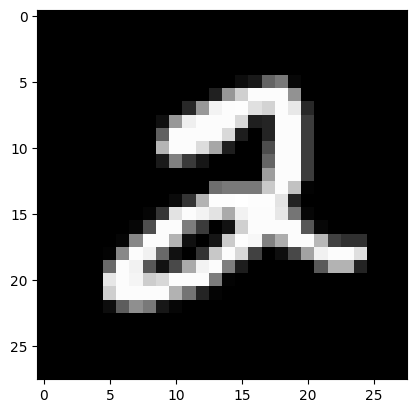

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape
single_image= X_train[5]
single_image.shape
plt.imshow(single_image,cmap='gray')

In [6]:
y_train.shape

(60000,)

In [7]:
X_train.min()

0

In [8]:
X_train.max()

255

In [5]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [10]:
X_train_scaled.min()
X_train_scaled.max()
y_train[5]

2

In [11]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [12]:
type(y_train_onehot)

numpy.ndarray

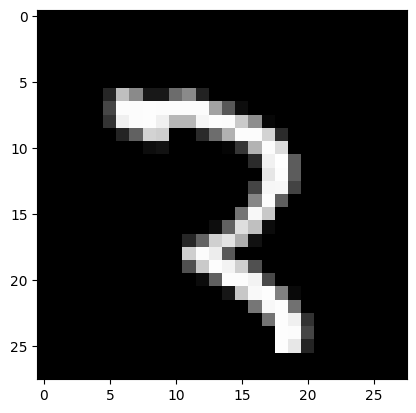

In [13]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [14]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, (3,3), activation="relu"),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(16, activation="relu"),
    Dense(16, activation='relu'),
    Dense(10, activation="softmax")  
])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)             

In [18]:
model.compile(
    'adam', 
    loss ='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_scaled ,
          y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot)
        )
metrics = pd.DataFrame(model.history.history)
metrics.head()

Epoch 1/5


938/938 [==============================] - 11s 11ms/step - loss: 0.3348 - accuracy: 0.8921 - val_loss: 0.1147 - val_accuracy: 0.9664
Epoch 2/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0941 - accuracy: 0.9722 - val_loss: 0.0692 - val_accuracy: 0.9780
Epoch 3/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0645 - accuracy: 0.9810 - val_loss: 0.0547 - val_accuracy: 0.9823
Epoch 4/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0514 - accuracy: 0.9848 - val_loss: 0.0480 - val_accuracy: 0.9854
Epoch 5/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0429 - accuracy: 0.9874 - val_loss: 0.0375 - val_accuracy: 0.9881


,loss,accuracy,val_loss,val_accuracy
0,0.334833,0.892100,0.114701,0.9664
1,0.094126,0.972217,0.069188,0.9780
2,0.064479,0.980983,0.054740,0.9823
3,0.051432,0.984783,0.048032,0.9854
4,0.042861,0.987400,0.037510,0.9881


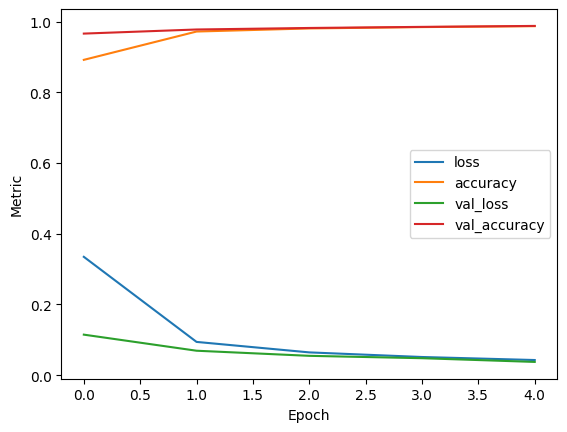

In [20]:
metrics.plot()
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.show()

In [22]:
import numpy as np
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [24]:
print("Name : YUVARAJ.S\nRegister Number : 212222240119\n")
print(confusion_matrix(y_test,x_test_predictions))

Name : YUVARAJ.S
Register Number : 212222240119

[[ 973    0    2    0    0    0    1    1    3    0]
 [   0 1124    1    1    1    0    2    1    5    0]
 [   2    4 1015    3    2    0    1    3    2    0]
 [   0    0    1 1005    0    1    0    0    3    0]
 [   0    0    0    0  974    0    3    1    1    3]
 [   2    0    0    8    0  877    2    1    2    0]
 [   4    1    0    0    1    2  949    0    1    0]
 [   0    3    7    1    0    0    0 1015    1    1]
 [   2    0    3    0    1    1    0    0  966    1]
 [   2    1    0    0    5    3    0    5   10  983]]


In [25]:
print("Name : YUVARAJ.S\nRegister Number : 212222240119\n")
print(classification_report(y_test,x_test_predictions))

Name : YUVARAJ.S
Register Number : 212222240119

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [26]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [43]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img('4.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor, (28, 28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy() / 255.0

In [44]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1, 28, 28, 1)), axis=1)
print(x_single_prediction)

1/1 [==============================] - 0s 20ms/step
[8]


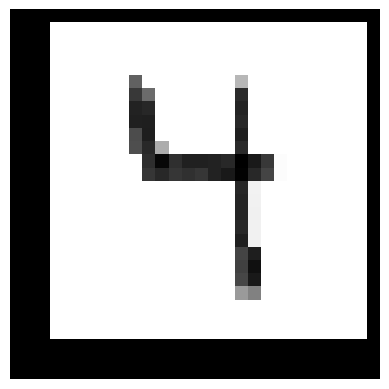

In [45]:
plt.imshow(img_28_gray_scaled.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()
img_28_gray_inverted = 255.0 - img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy() / 255.0

1/1 [==============================] - 0s 34ms/step
[4]


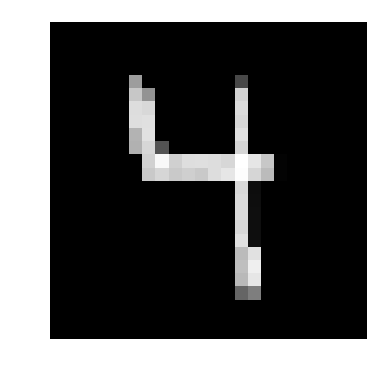

In [49]:
x_single_prediction_inverted = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1, 28, 28, 1)), axis=1)
print(x_single_prediction_inverted)
plt.imshow(img_28_gray_inverted_scaled.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()